In [5]:
import numpy as np
import util
import NN

import matplotlib.pyplot as plt

In [2]:
EPOCHS = 1000

x, y = util.generate_linear(100)
layers = [
    NN.FC_layer(2, 32, True),
    NN.relu(),
    NN.FC_layer(32, 32, True),
    NN.relu(),
    NN.FC_layer(32, 1, True),
    NN.sigmoid()
]
DNN = NN.myNN(layers)
loss = NN.MSE()
#opti = NN.optimizer('SGD', 0.01)
#opti = NN.optimizer('momentum', 0.01, {'beta' : 0.9})
#opti = NN.optimizer('adagrad', 0.01, {'epsilon' : 1e-8})
opti = NN.optimizer('adam', 0.01, {'epsilon':1e-8, 'beta1':0.9, 'beta2':0.999})

losses = []

for epoch in range(1, EPOCHS+1):
    y_pred = DNN.forward(x)
    loss_value = loss.forward(y, y_pred)
    losses.append(loss_value)

    dy = loss.backward(y, y_pred)
    DNN.backward(dy, opti)
    
    if epoch % 100 == 0:
        accuracy = util.accuracy(y, y_pred)
        print(f'epoch: {epoch}, loss: {loss_value}, accuracy: {accuracy}')


epoch: 100, loss: 0.004674962869047767, accuracy: 1.0
epoch: 200, loss: 0.0018490899946021974, accuracy: 1.0
epoch: 300, loss: 0.0008074705011606256, accuracy: 1.0
epoch: 400, loss: 0.00040213108431105425, accuracy: 1.0
epoch: 500, loss: 0.00022680802845729498, accuracy: 1.0
epoch: 600, loss: 0.0001409365028801128, accuracy: 1.0
epoch: 700, loss: 9.418384783617746e-05, accuracy: 1.0
epoch: 800, loss: 6.649621328254491e-05, accuracy: 1.0
epoch: 900, loss: 4.897424661519834e-05, accuracy: 1.0
epoch: 1000, loss: 3.72843222947173e-05, accuracy: 1.0


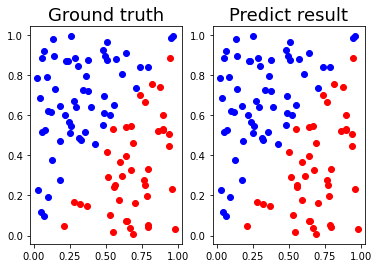

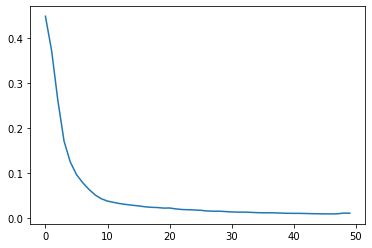

In [6]:
y_pred = np.around(y_pred)
util.show_result(x, y, y_pred)
plt.plot(losses[0:50])
plt.show()